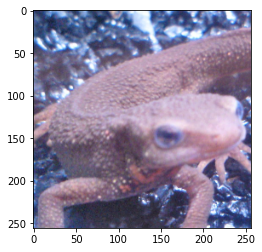

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')

plt.imshow(img_orig)
plt.show()

In [13]:
# 1: チャンネル入れ替え
def RGBtoBGR(img):
    return img[..., ::-1]

img_org_inverse = RGBtoBGR(img_orig)

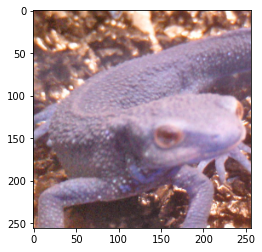

In [14]:
plt.imshow(img_org_inverse)
plt.show();

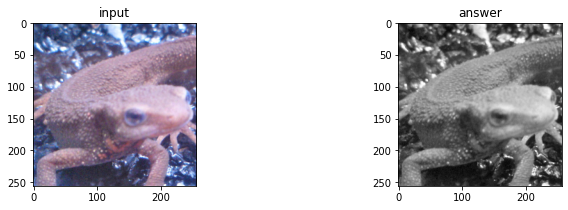

In [17]:
# 2: グレースケール
# grayscale = 0.2126R + 0.7152G + 0.0722B
# それぞれの係数は人間の視覚の敏感さであり、Gに人間は最も強く反応し、Bにはあまり反応しないことを示す
# opencv
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
plt.figure(figsize= (12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1,2,2)
plt.title('answer')
plt.imshow(img_gray, cmap='gray')
plt.show();

In [20]:
def rgb2gray(img):
    _img = img.copy().astype(np.float32)
    gray = _img[..., 0] * 0.2126 + _img[..., 1] * 0.7152 + _img[..., 2] * 0.0722
    gray = np.clip(gray, 0, 255)
    return gray.astype(np.uint8)

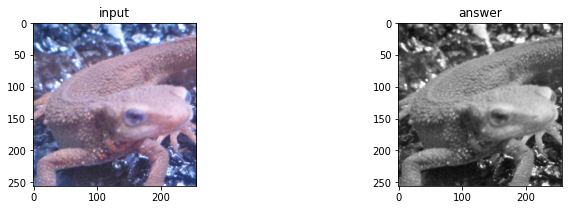

In [21]:
img_gray = rgb2gray(img_orig)
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_gray, cmap='gray')
plt.show()

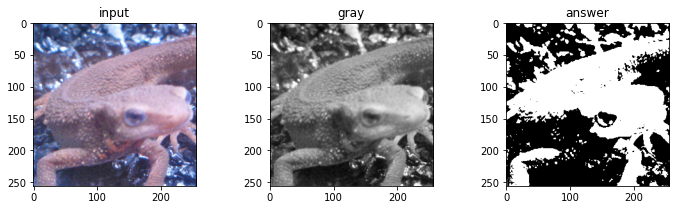

In [24]:
# 3: 二値化, Binarization
# opencv
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
th, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 3, 2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('answer')
plt.imshow(img_bin, cmap='gray')
plt.show()

In [25]:
def binary(img, th):
    _img = img.copy()
    _img = np.minimum(_img // th, 1) * 255
    return _img.astype(np.uint8)

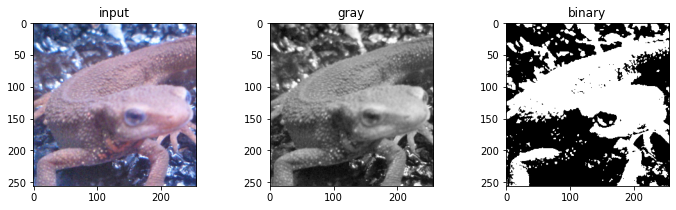

In [28]:
img_gray = rgb2gray(img_orig)
img_bin = binary(img_gray, 127)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 3, 2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('binary')
plt.imshow(img_bin, cmap='gray')
plt.show();

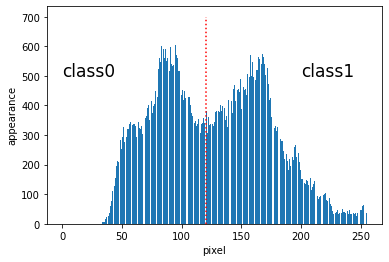

In [29]:
# 4: 大津の二値化, Otsu's binaarization
# 大津の二値化とは判別分析法と呼ばれ、
# 二値化における分離の閾値を自動決定する教師なし手法である。 
# これはクラス内分散とクラス間分散の比から計算される。

# 二つのクラスがバランスよく分離できれば良い二値化
plt.hist(img_gray.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.text(0, 500, 'class0', fontsize=17)
plt.text(200, 500, 'class1', fontsize=17)
plt.vlines(120, 0, 700, color='red', linestyles='dotted')
plt.xlabel('pixel')
plt.ylabel('appearance')
plt.show()

threshold >> 127.0


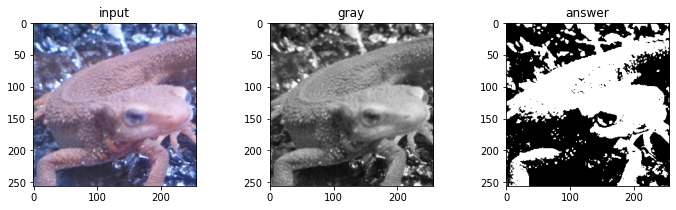

In [31]:
# opencv
# 0から255を閾値として探索し、最もクラス間の分散比が大きいthを選択(教師なし)
th, img_bin = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("threshold >>", th)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 3, 2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('answer')
plt.imshow(img_bin, cmap='gray')
plt.show()

In [40]:
def otsu_thresh(img):
    max_vari = -1
    max_th = 0
    for th in range(1, 254):
        m0 = img[img <= th].mean()
        m1 = img[img > th].mean()
        w0 = img[img <= th].size
        w1 = img[img > th].size
        vari = w0 * w1/((w0 + w1) ** 2) * ((m0 - m1) ** 2)
        if vari > max_vari:
            max_th = th
            max_vari = vari
            
    img = binary(img, max_th)
    return max_th, img

<ipython-input-40-2e41c22879f7>:5: RuntimeWarning: Mean of empty slice.
  m0 = img[img <= th].mean()


threshold >>  127


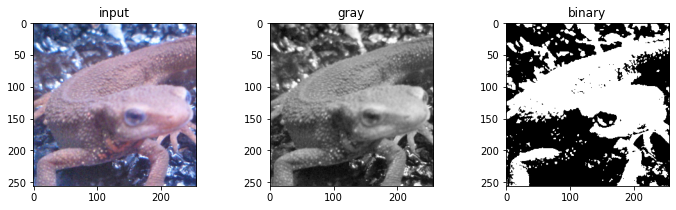

In [41]:
th, img_bin = otsu_thresh(img_gray)
print('threshold >> ', th)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 3, 2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('binary')
plt.imshow(img_bin, cmap='gray')
plt.show();

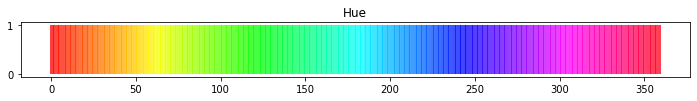

In [42]:
# 5: HSV変換, HSV transformation
# HSV変換とは、Hue(色相)、Saturation(彩度)、Value(明度) で色を表現する手法
# Saturation … 色の鮮やかさ。Saturationが低いと灰色さが顕著になり、くすんだ色となる。 ( 0 <= S < 1)
# Value … 色の明るさ。Valueが高いほど白に近く、Valueが低いほど黒に近くなる。 ( 0 <= V < 1)
# Hue … 色合いを0~360度で表現し、赤や青など色の種類を示す。 ( 0 <= H < 1) 色相は次の色に対応する。

from matplotlib import cm
plt.figure(figsize=(12, 1))
plt.title('Hue')
for i in range(360):
    plt.vlines(i, 0, 1, color=cm.hsv(i/360))
plt.show();

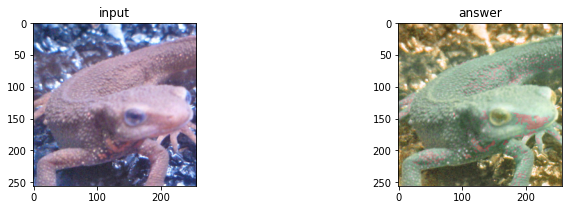

In [44]:
# opencv
hsv = cv2.cvtColor(img_orig, cv2.COLOR_RGB2HSV) # RGB -> HSV
# Hue of opencv is defined [0, 180]
hsv[..., 0] = (hsv[..., 0] + 90) % 180
img_hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB) # HSV -> RGB
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_hsv)
plt.show()

In [61]:
def rgb2hsv(img):
    _img = img.copy().astype(np.float32)
    v_max = _img.max(axis = 2)
    v_min = _img.min(axis = 2)
    v_argmin = _img.argmin(axis = 2)
    hsv = np.zeros_like(_img, dtype=np.float32)
    r, g, b = np.split(_img, 3, axis = 2)
    r, g, b = r[..., 0], g[..., 0], b[..., 0]
    diff = np.maximum(v_max - v_min, 1e-10)
    
    # Hue
    ind = v_argmin == 2
    hsv[..., 0][ind] = 60 * (g-r)[ind] / diff[ind] + 60
    ind = v_argmin == 0 
    hsv[..., 0][ind] = 60 * (b - g)[ind] / diff[ind] + 180
    ind = v_argmin == 1 
    hsv[..., 0][ind] = 60 * (r - b)[ind] / diff[ind] + 300
    ind = v_max == v_min
    hsv[..., 0][ind] = 0
    
    # Saturation
    hsv[..., 1] = v_max - v_min
    # Value
    hsv[..., 2] = v_max
    
    return hsv

def hsv2rgb(hsv):
    h, s, v = np.split(hsv, 3, axis=2)
    h, s, v = h[..., 0], s[..., 0], v[..., 0]
    _h = h/60
    x = s * (1 - np.abs(_h%2 - 1))
    z = np.zeros_like(x)
    vals = np.array([[s, x, z], [x, s, z], [z, s, x], [z, x, s], [x, z, s], [s, z, x]])
    img = np.zeros_like(hsv)
    
    for i in range(6):
        ind = _h.astype(int) == i
        for j in range(3):
            img[..., j][ind] = (v-s)[ind] + vals[i, j][ind]
    
    return np.clip(img, 0, 255).astype(np.uint8)
    

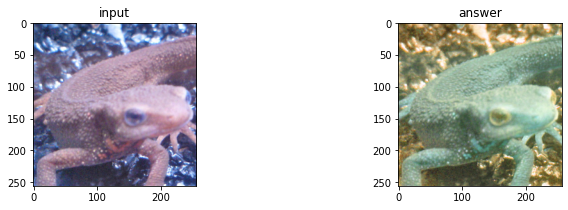

In [68]:
hsv = rgb2hsv(img_orig) # RGB -> HSV
hsv[..., 0] = (hsv[..., 0] + 180) % 360 # Hue of opencv is defined [0, 180]
img_hsv = hsv2rgb(hsv) # HSV -> RGB
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_hsv)
plt.show()

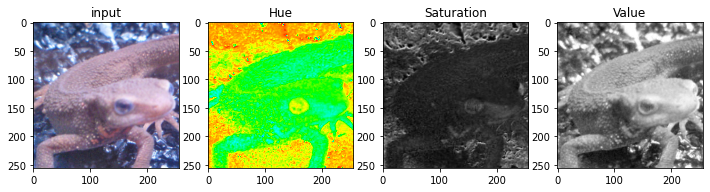

In [69]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 4, 2)
plt.title('Hue')
plt.imshow(hsv[..., 0] / 360, cmap='hsv')

plt.subplot(1, 4, 3)
plt.title('Saturation')
plt.imshow(hsv[..., 1], cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Value')
plt.imshow(hsv[..., 2], cmap='gray')

plt.show()

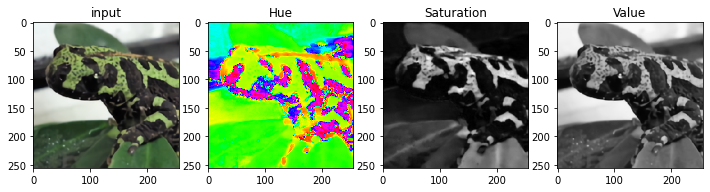

In [70]:
# 他の画像でも見る
img_madara_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/madara_256x256.png')

hsv = rgb2hsv(img_madara_orig)
plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
plt.title('input')
plt.imshow(img_madara_orig)

plt.subplot(1, 4, 2)
plt.title('Hue')
plt.imshow(hsv[..., 0] / 360, cmap='hsv')

plt.subplot(1, 4, 3)
plt.title('Saturation')
plt.imshow(hsv[..., 1], cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Value')
plt.imshow(hsv[..., 2], cmap='gray')

plt.show()

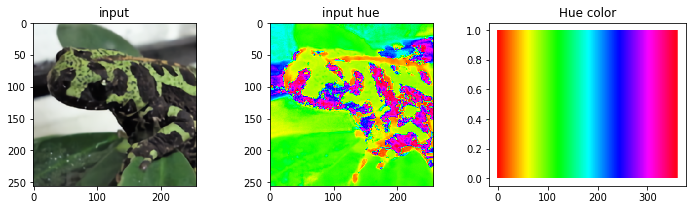

In [72]:
# Hueを見る
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_madara_orig)
plt.subplot(1, 3, 2)
plt.title('input hue')
plt.imshow(hsv[..., 0]/360, cmap='hsv')
plt.subplot(1, 3, 3)
plt.title('Hue color')
for i in range(360):
    plt.vlines(i, 0, 1, color=cm.hsv(i/360))
plt.show();
